In [1]:
from autolens.profiles import mass_profiles
from autolens.lensing import galaxy
from autolens.imaging import mask
from autolens.plotting import plotters

# In this example, we'll create a grid of Cartesian (y,x) coordinates, representing the
# arc second coordinate grid of an observed image. 

In [3]:
# In AutoLens, a grid is a set of two-dimensional (y,x) coordinates (in arc-seconds) that are deflected 
# and traced by a strong lensing system. 

# This coordinate grid is aligned with the image we analyze, thus each coordinate maps to the centre of 
# each image-pixel. Lets make a grid using a 100 x 100 pixel image, with a pixel scale (arcsecond-to-pixel 
# conversion factor) of 0.05", giving us a a 5" x 5" grid. 
image_grids = mask.ImagingGrids.from_shape_and_pixel_scale(shape=(10, 100), pixel_scale=0.05, 
                                                                 sub_grid_size=2)

# If we print the grid, we see it consists of a set of arc-second coordinates 
# (noting that the difference between each coordinate is the 'pixel_scale' of 0.05" defined above)
print('(y,x) image-pixel 1:')
print(image_grids.image[0])
print('(y,x) image-pixel 2:')
print(image_grids.image[1])
print('(y,x) image-pixel 3:')
print(image_grids.image[2])
print('(y,x) image-pixel 101:')
print(image_grids.image[100])
print('etc.')


(y,x) image-pixel 1:
[ 0.225 -2.475]
(y,x) image-pixel 2:
[ 0.225 -2.425]
(y,x) image-pixel 3:
[ 0.225 -2.375]
(y,x) image-pixel 101:
[ 0.175 -2.475]
etc.


In [4]:
# (PyAutoLens actually flattens the NumPy array to 1D to save memory, however it consists of all 
# 10000 pixel coordinates on our 2D grid)
print(image_grids.image.shape)

(1000, 2)


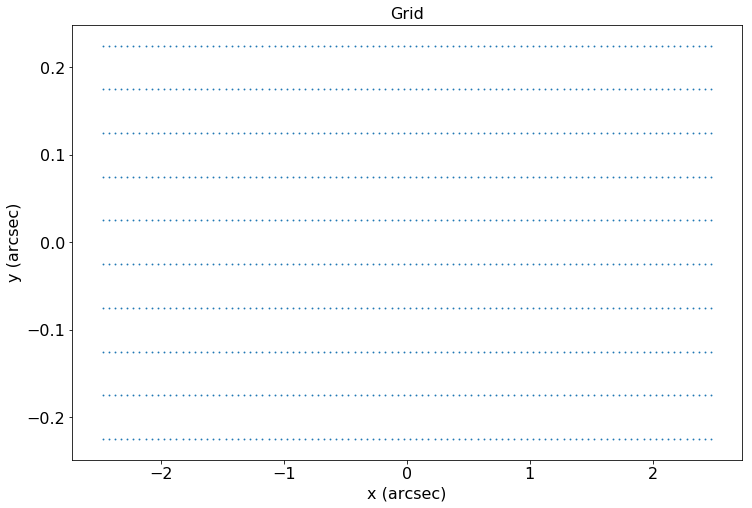

In [5]:
# We can also plot the grid, albeit it's a fairly bland uniform grid of dots.
plotters.plot_grid(grid=image_grids.image)

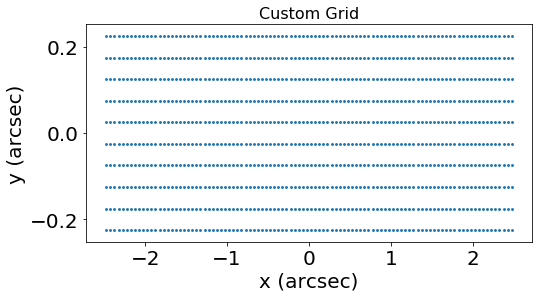

In [6]:
# A quick aside - we've tried our hardest to make figures like the one above appear a good size / have no overlapping
# labels. However, this depends somewhat on the display setting of your computer. If a figure doesn't look great,
# You can customize its appearance using standard Matplotlib variables. For example, we can change the grid's appearance
# above as follows:

plotters.plot_grid(grid=image_grids.image, title='Custom Grid', xlabelsize=20, ylabelsize=20, xyticksize=20, pointsize=14,
                   figsize=(8, 4))

# You can customize every plotter in AutoLens in this way!


In [7]:
# You might be wondering why the image_grids are using the attribute 'image' (e.g. image_grids.image).

# This is because it consists of multiple grids. The 'image' grid is the grid where each (x,y) coordinate is located at 
# the centre of each image pixel.

# There is also a sub-grid, which splits each image-pixel into a (sub_grid_size x sub_grid_size) pixel. This is
# used for evaluating light and mass profiles at a higher resolution and thus more accurately.

# We specified a sub_grid_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than image-pixels (still 
# flattened to 1D).
print(image_grids.image.shape)
print(image_grids.sub.shape)

(1000, 2)
(4000, 2)


In [8]:
# The sub-pixels coordinates can also be printed:
print('(y,x) sub-pixel 1 (of image pixel 1):')
print(image_grids.sub[0])
print('(y,x) sub-pixel 2 (of image pixel 1):')
print(image_grids.sub[1])
print('(y,x) sub-pixel 3 (of image pixel 1):')
print(image_grids.sub[2])
print('(y,x) sub-pixel 4 (of image pixel 1):')
print(image_grids.sub[3])
print('(y,x) sub-pixel 1 (of image pixel 2):')
print(image_grids.sub[4])
print('etc.')

(y,x) sub-pixel 1 (of image pixel 1):
[ 0.23333333 -2.48333333]
(y,x) sub-pixel 2 (of image pixel 1):
[ 0.23333333 -2.46666667]
(y,x) sub-pixel 3 (of image pixel 1):
[ 0.21666667 -2.48333333]
(y,x) sub-pixel 4 (of image pixel 1):
[ 0.21666667 -2.46666667]
(y,x) sub-pixel 1 (of image pixel 2):
[ 0.23333333 -2.43333333]
etc.


In [9]:
# Congratulations, you've completed your first PyAutoLens tutorial! Before moving on to the next one, experiment with
# PyAutoLens by doing the following:
#
# 1) Change the pixel-scale of the grid - what happens to the Cartesian coordinates?
# 2) Change the resolution of the grid - what happens Cartesian coordinates?
# 3) Change the sub-grid size - what do you note about the pixel-scale of sub pixels?